In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
trainpathnon  = "/content/drive/MyDrive//Artificial_intelligence2/Non_Demented"
trainpathmild  = "/content/drive/MyDrive/Artificial_intelligence2/Mild_Demented"
trainpathMode  = "/content/drive/MyDrive/Artificial_intelligence2/Moderate_Demented"
trainpathVeryMild  = "/content/drive/MyDrive/Artificial_intelligence2/Very_Mild_Demented"

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import cv2
import ipywidgets
from PIL import Image


from keras.utils import img_to_array ,array_to_img , to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,MaxPool2D,Dense 

In [4]:
import tensorflow as tf

In [5]:
print(len(os.listdir(trainpathnon)))
print(len(os.listdir(trainpathVeryMild)))
print(len(os.listdir(trainpathmild)))
print(len(os.listdir(trainpathMode)))

128
128
128
64


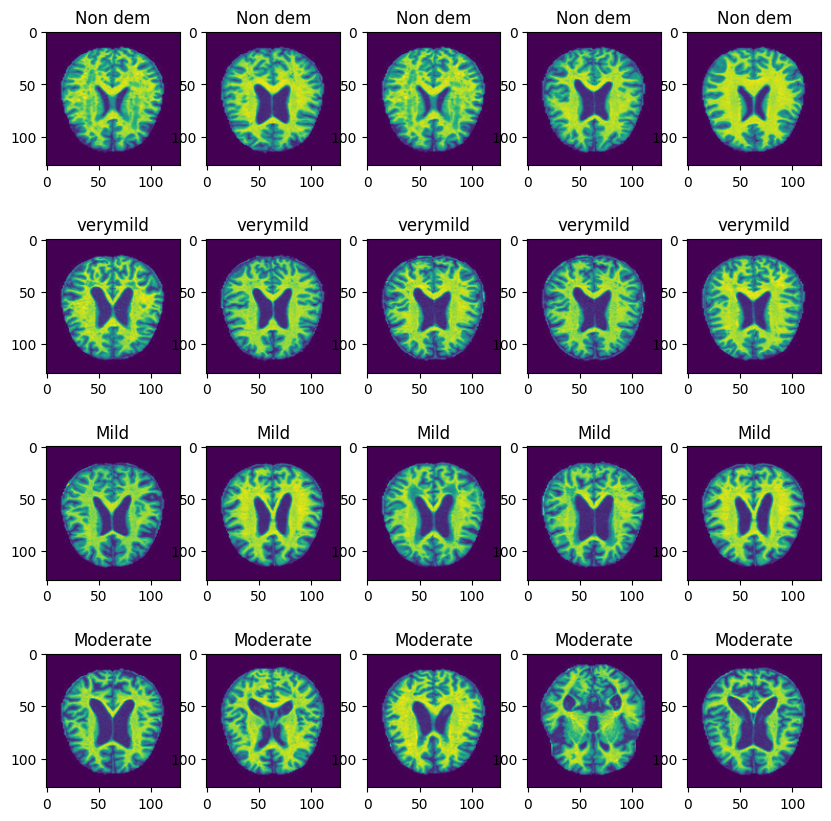

In [6]:
m=0
fig,axes=plt.subplots(4,5,figsize=(10,10))
axes=axes.ravel()
plt.subplots_adjust(hspace=0.4)
for i in range(5):
  img = plt.imread(trainpathnon+'/'+random.choice(os.listdir(trainpathnon)))
  axes[m].imshow(img)
  axes[m].set_title("Non dem")
  m+=1
for i in range(5):
  img = plt.imread(trainpathVeryMild+'/'+random.choice(os.listdir(trainpathVeryMild)))
  axes[m].imshow(img)
  axes[m].set_title("verymild")
  m+=1
for i in range(5):
  img = plt.imread(trainpathmild+'/'+random.choice(os.listdir(trainpathmild)))
  axes[m].imshow(img)
  axes[m].set_title("Mild")
  m+=1
for i in range(5):
  img = plt.imread(trainpathMode+'/'+random.choice(os.listdir(trainpathMode)))
  axes[m].imshow(img)
  axes[m].set_title("Moderate")
  m+=1

In [7]:
def convert_image_to_array(path):
  try:
    image=cv2.imread(path)
    if image is not None:
      image = cv2.resize(image,(128,128))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as err:
    print("Error : ",err)

In [8]:
path  = "/content/drive/MyDrive/Artificial_intelligence2"
root_dir = os.listdir(path)
print(root_dir)

['Moderate_Demented', 'Mild_Demented', 'Very_Mild_Demented', 'Non_Demented']


In [9]:
for dir in root_dir:
  print(dir)

Moderate_Demented
Mild_Demented
Very_Mild_Demented
Non_Demented


In [10]:
# image_list,image_label= [],[]
# temp =-1
# for dir in root_dir:
#   all_image_list=os.listdir(path+'/'+dir)
#   temp+=1
  
#   for file in all_image_list:
#     if (len(image_list)==(52*(temp+1))):
#       break
#     new_path=path+'/'+dir+'/'+file
#     image_list.append(convert_image_to_array(new_path))
#     image_label.append(temp)

In [11]:
from PIL import Image

In [12]:
image_list,image_label= [],[]
temp=0
all_image_list=os.listdir(path+'/'+root_dir[3])
for file in all_image_list:
  if (len(image_list)==(128*(temp+1))):
    break
  new_path=path+'/'+root_dir[3]+'/'+file
  image_list.append(convert_image_to_array(new_path))
  image_label.append(temp)
temp=1
print(root_dir[3])
all_image_list=os.listdir(path+'/'+root_dir[2])
for file in all_image_list:
  if (len(image_list)==(128*(temp+1))):
    break
  new_path=path+'/'+root_dir[2]+'/'+file
  image_list.append(convert_image_to_array(new_path))
  image_label.append(temp)
temp=2
print(root_dir[2])
all_image_list=os.listdir(path+'/'+root_dir[1])
for file in all_image_list:
  if (len(image_list)==(128*(temp+1))):
    break
  new_path=path+'/'+root_dir[1]+'/'+file
  image_list.append(convert_image_to_array(new_path))
  image_label.append(temp)
temp=3
print(root_dir[1])
all_image_list=os.listdir(path+'/'+root_dir[0])
for file in all_image_list:
  new_path=path+'/'+root_dir[0]+'/'+file
  image_list.append(convert_image_to_array(new_path))
  image_label.append(temp)
print(root_dir[0])
for file in all_image_list:
  new_path=path+'/'+root_dir[0]+'/'+file
  image=cv2.imread(new_path)
  if image is not None:
    image = cv2.resize(image,(128,128))
    img = cv2.flip(image, 1)
    image = img_to_array(img)
    image_list.append(image)
    image_label.append(temp)
print(root_dir[0])



Non_Demented
Very_Mild_Demented
Mild_Demented
Moderate_Demented
Moderate_Demented


In [13]:
len(image_list)

512

In [14]:
for i in image_list[0][0]:
  print(i)

[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]

In [15]:
np.unique(image_label,return_counts=True)

(array([0, 1, 2, 3]), array([128, 128, 128, 128]))

In [16]:
norm_image = np.array(image_list,dtype=np.float16)/255.0

In [17]:
norm_image.shape

(512, 128, 128, 3)

In [18]:
from keras.optimizers import Adam
import sklearn

In [19]:
# ytrain, xtrain = sklearn.utils.shuffle(image_label,norm_image)
# ytest ,xtest = sklearn.utils.shuffle(image_label2,norm_image2)
xtrain,xtest,ytrain,ytest = train_test_split(norm_image,image_label,random_state=0)
xtrain.shape

(384, 128, 128, 3)

In [20]:
xtrain.shape

(384, 128, 128, 3)

In [21]:
xtest.shape

(128, 128, 128, 3)

In [22]:
# ytrain = to_categorical(ytrain)
# ytest = to_categorical(ytest)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [23]:
model=Sequential()
model.add(Conv2D(16,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(24,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 16)        2320      
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 21904)             0         
                                                        

In [25]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])

In [26]:
hist=model.fit(xtrain,ytrain,epochs=8,batch_size=5,validation_split=0.08)

Epoch 1/8
71/71 [==============================] - 10s 16ms/step - loss: 1.3610 - accuracy: 0.2550 - val_loss: 1.2401 - val_accuracy: 0.4839
Epoch 2/8
71/71 [==============================] - 1s 7ms/step - loss: 1.0900 - accuracy: 0.4646 - val_loss: 0.8974 - val_accuracy: 0.6774
Epoch 3/8
71/71 [==============================] - 0s 7ms/step - loss: 0.7848 - accuracy: 0.6516 - val_loss: 0.7045 - val_accuracy: 0.7097
Epoch 4/8
71/71 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.6827 - val_loss: 0.6296 - val_accuracy: 0.7419
Epoch 5/8
71/71 [==============================] - 0s 7ms/step - loss: 0.3889 - accuracy: 0.8555 - val_loss: 0.6819 - val_accuracy: 0.7742
Epoch 6/8
71/71 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9235 - val_loss: 0.6299 - val_accuracy: 0.7742
Epoch 7/8
71/71 [==============================] - 0s 5ms/step - loss: 0.1130 - accuracy: 0.9632 - val_loss: 0.8416 - val_accuracy: 0.8710
Epoch 8/8
71/71 [========

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
ypred=model.predict(xtest)


4/4 [==============================] - 1s 10ms/step


In [29]:
actual=np.argmax(ypred,axis=1)
pred=np.argmax(ypred,axis=1) 
accuracy_score(actual,pred)

1.0

The following above is Simple CNN Resulting in upto 87% accuracy before OverFitting . Now  we will use

In [30]:
!pip install lime

import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=dc3f1dc329d39d7c05f710f8b117f8bf9a74314a61396e64291bd92d394f03a4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [31]:
from tensorflow import keras
from tensorflow.keras import layers


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 47ms/step


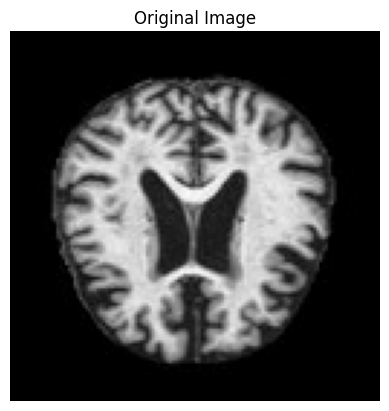

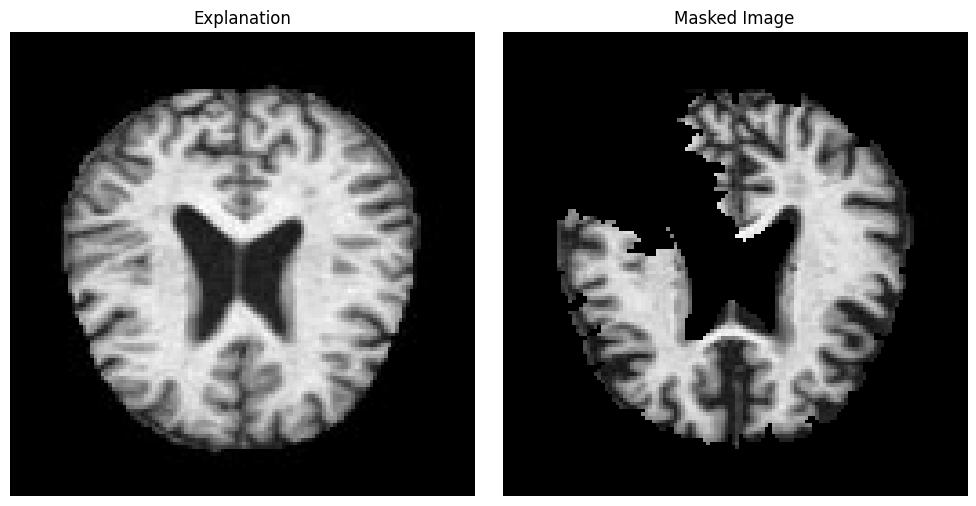

In [32]:
explainer = lime_image.LimeImageExplainer(random_state=4)

# Define the predict function
predict_fn = lambda x: model.predict(x)

# Convert xtrain and xtest to float32
xtrain = xtrain.astype(np.float32)
xtest = xtest.astype(np.float32)

# Explain the instance
explanation = explainer.explain_instance(xtrain[10], predict_fn)

# Display the original image
plt.imshow(xtest[10])
plt.axis('off')
plt.title('Original Image')
plt.show()

# Generate and display the explanation image
image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Rescale the image and mask to the range of [0, 255]
image = (image * 255).astype(np.uint8)
mask = (mask * 255).astype(np.uint8)

# Apply the mask to the original image
masked_image = np.copy(xtest[10])
masked_image[mask == 0] = 0

# Display the explanation image and masked image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Explanation')

axes[1].imshow(masked_image)
axes[1].axis('off')
axes[1].set_title('Masked Image')

plt.tight_layout()
plt.show()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


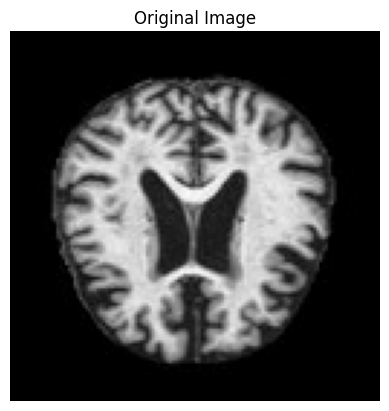

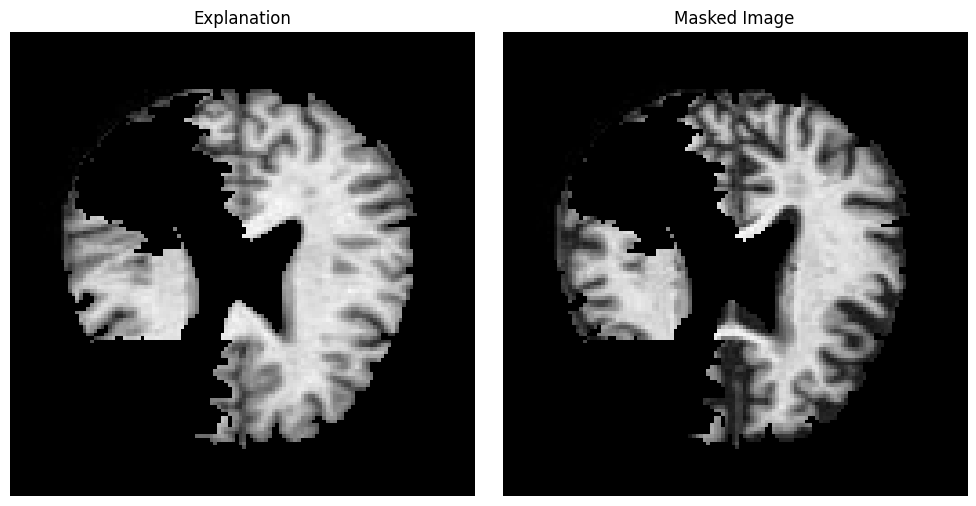

In [45]:
explainer = lime_image.LimeImageExplainer(random_state=4)

# Define the predict function
predict_fn = lambda x: model.predict(x)

# Convert xtrain and xtest to float32
xtrain = xtrain.astype(np.float32)
xtest = xtest.astype(np.float32)

# Explain the instance
explanation = explainer.explain_instance(xtrain[10], predict_fn)

# Display the original image
plt.imshow(xtest[10])
plt.axis('off')
plt.title('Original Image')
plt.show()

# Generate and display the explanation image
image, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, hide_rest=False)

# Rescale the image and mask to the range of [0, 255]
image = (image * 255).astype(np.uint8)
mask = (mask * 255).astype(np.uint8)

# Apply the mask to the original image
masked_image = np.copy(xtest[10])
masked_image[mask == 0] = 0

# Display the explanation image and masked image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Explanation')

axes[1].imshow(masked_image)
axes[1].axis('off')
axes[1].set_title('Masked Image')

plt.tight_layout()
plt.show()


In [ ]:
explainer = lime_image.LimeImageExplainer()